In [1]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import csv
import folium

In [60]:
df = pd.read_csv(r"C:\Users\julii\PycharmProjects\Education\inputs\label\Education_Labels_Child_Youth_Aduld.csv")
label = pd.read_csv(r"C:\Users\julii\PycharmProjects\Education\inputs\label\Education_Labels.csv")

path = r"C:\Users\julii\PycharmProjects\Education\train_education\Random_Split_Cross_Val_Rural\Female_Education_PCAi\!996x996_c432_fillmean_rlocal_channel_mean_clipvoutlier2.5_normZ_f10815vgg16_wimagenet_unfl100_dFalse_lr0.0001_momentum0.9_optimizerSGD__m_vgg16_hFalse_wFalse_1\csv\Since 2015 STD None.csv"
#path = r"C:\Users\julii\PycharmProjects\Education\train_education\Random_Split_Cross_Val_Urban\Female_Education_PCAN\best200x200_c432_fillmean_rlocal_channel_mean_clipvoutlier2.5_normZ_f6805vgg16_wimagenet_unfl100_dFalse_lr0.0001_momentum0.9_optimizerSGD_horizontal_flip__m_vgg16_hFalse_wFalse_1\csv\Since 2015 STD None.csv"

clusters = pd.read_csv(path)

clusters = clusters.merge(df, on="DHSID", how="left", suffixes=('', '_remove'))
clusters.drop([i for i in clusters.columns if 'remove' in i], axis=1, inplace=True)
clusters = clusters.merge(label, on="DHSID", how="left", suffixes=('', '_drop'))
clusters.drop([i for i in clusters.columns if 'drop' in i], axis=1, inplace=True)

In [73]:
clusters[["DHSYEAR", "Female Education PCA (min-max-scaled)", "Absolute Error"]].groupby("DHSYEAR").mean()

,Female Education PCA (min-max-scaled),Absolute Error
DHSYEAR,,
2015.0,0.396108,0.117587
2016.0,0.354423,0.092833
2017.0,0.226423,0.141981
2018.0,0.337600,0.143282
2019.0,0.297722,0.110229


coefficient of determination: 0.01034497324249184
intercept: 19.465443335379515
slope: [-1.76789252]


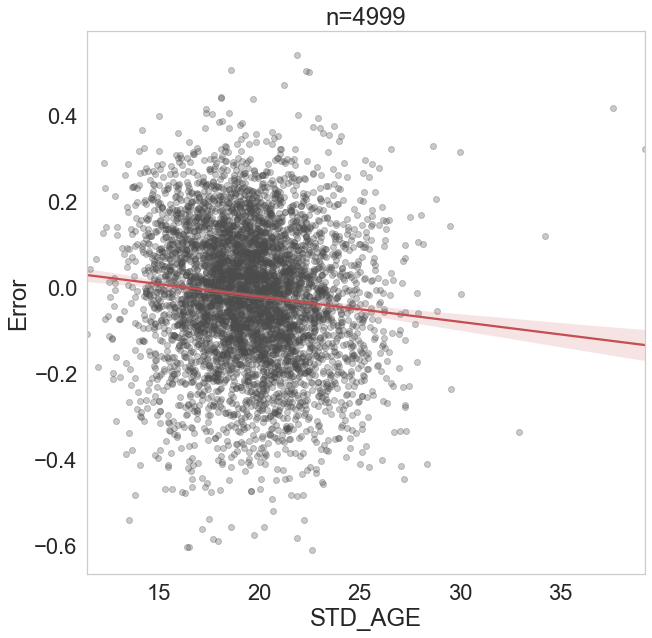

In [61]:
#linear regression line
import numpy as np
from sklearn.linear_model import LinearRegression

clusters = clusters.dropna(subset=['Error', 'STD_AGE'])

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.regplot(data=clusters, x='STD_AGE', y='Error', 
                scatter_kws={'alpha':0.3}, color=".3", line_kws=dict(color="r"))#.set(ylim=(0, 1), xlim=(0, 1))

#plt.title("Lineare Regression: \n Education Index (PC1) vs. \n Education Index (EDI) je Cluster und Erhebungsjahr")
plt.title(f"n={len(clusters.index)}")
plt.xlabel('STD_AGE')
plt.ylabel('Error')

y=np.array(clusters['STD_AGE'])
x=np.array(clusters['Error']).reshape((-1, 1))

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#https://realpython.com/linear-regression-in-python/

coefficient of determination: 0.5678833447706896
intercept: 0.3245931110245748
slope: [-0.93857053]


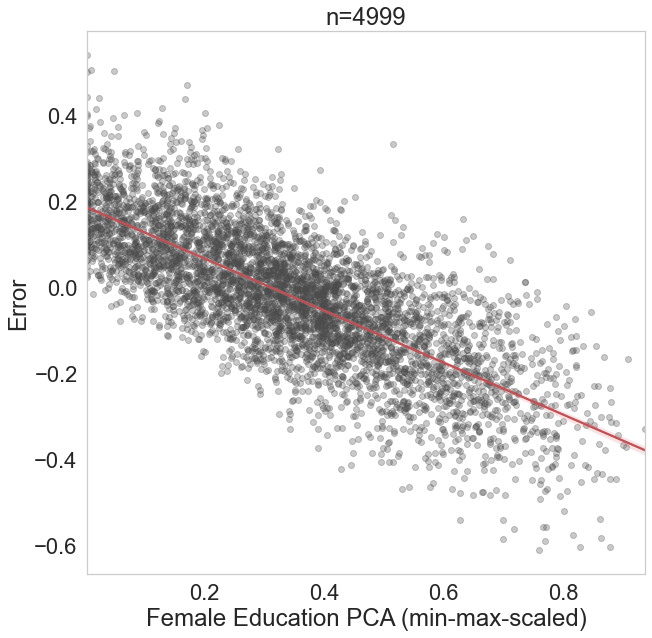

In [62]:
#linear regression line
import numpy as np
from sklearn.linear_model import LinearRegression

clusters = clusters.dropna(subset=['Error', 'Female Education PCA (min-max-scaled)'])

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.regplot(data=clusters, x='Female Education PCA (min-max-scaled)', y='Error', 
                scatter_kws={'alpha':0.3}, color=".3", line_kws=dict(color="r"))#.set(ylim=(0, 1), xlim=(0, 1))

#plt.title("Lineare Regression: \n Education Index (PC1) vs. \n Education Index (EDI) je Cluster und Erhebungsjahr")
plt.title(f"n={len(clusters.index)}")
plt.xlabel('Female Education PCA (min-max-scaled)')
plt.ylabel('Error')

y=np.array(clusters['Female Education PCA (min-max-scaled)'])
x=np.array(clusters['Error']).reshape((-1, 1))

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#https://realpython.com/linear-regression-in-python/

In [63]:
def ordinal(x):
    x = x*10
    if (x <= 1):
        return 1
    if (x > 1) & (x <= 2):
        return 2
    if (x > 2) & (x <= 3):
        return 3
    if (x > 3) & (x <= 4):
        return 4
    if (x > 4) & (x <= 5):
        return 5
    if (x > 5) & (x <= 6):
        return 6
    if (x > 6) & (x <= 7):
        return 7
    if (x > 7) & (x <= 8):
        return 8
    if (x > 8) & (x <= 9):
        return 9
    if (x > 9):
        return 10
    
clusters['Female Education - Ordinal'] =  clusters['Female Education PCA (min-max-scaled)'].apply(lambda x: ordinal(x))

[Text(0.5, 1.0, 'n=4999')]

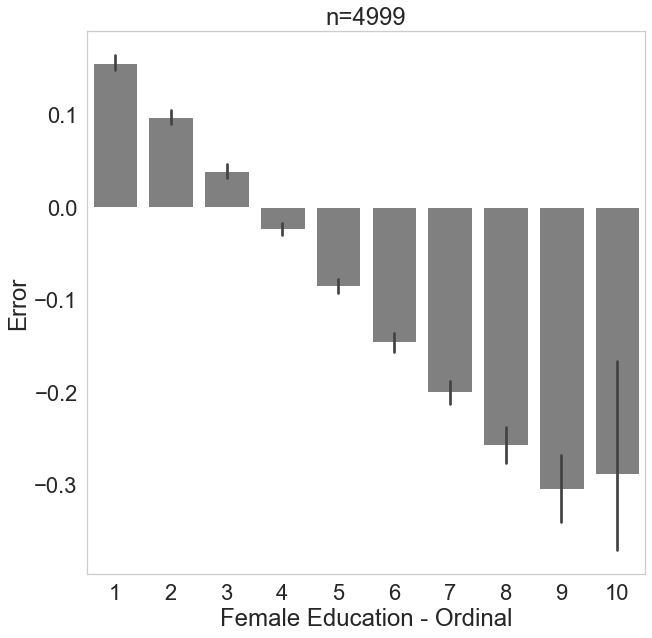

In [69]:
sns.barplot(data=clusters, x='Female Education - Ordinal', y='Error', color="grey").set(title=f'n={len(clusters.index)}')

In [65]:
cols = ["run_name",
"split name",
#"Train, val, test mode",
#"Since 2015 STD 2 beta",
#"Since 2015 STD 2 alpha",
"Since 2015 STD 2 pearson_corr",
"Since 2015 STD 2 rmse",
"Since 2015 STD 2 nrmse",
#"Val beta",
#"Val alpha",
"Val pearson_corr",
"Val rmse",
"Val nrmse",
#"Val: different Split Models beta",
#"Val: different Split Models alpha",
##"Val: different Split Models pearson_corr",
##"Val: different Split Models rmse",
##"Val: different Split Models nrmse",
#"Test beta",
#"Test alpha",
"Test pearson_corr",
"Test rmse",
"Test nrmse",
#"Test: different Split Models beta",
#"Test: different Split Models alpha",
##"Test: different Split Models pearson_corr",
##"Test: different Split Models rmse",
##"Test: different Split Models nrmse"
]

In [66]:
df = pd.read_csv(r"C:\Users\julii\PycharmProjects\Education\train_education\run_summary.csv")

In [67]:
df[df['label normalization']!="Z"][cols].sort_values(by="run_name").to_csv(r"C:\Users\julii\PycharmProjects\Education\train_education\summary.csv")